In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import pickle
import numpy as np

# Gensim
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
#from gensim.parsing.preprocessing import STOPWORDS

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import  pyLDAvis.gensim # don't skip this
from matplotlib import pyplot as plt


import nltk
from nltk.corpus import stopwords
# from stop_words import get_stop_words

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import os
cwd = os.getcwd()
data_dir = os.path.join(cwd,'Category Dataframe')
os.chdir(data_dir)
data_dir

'C:\\Users\\peng.x\\OneDrive\\Project\\Category Dataframe'

df1 = pd.read_pickle("df_1_0.001.pkl")
df2 = pd.read_pickle("df_2_0.001.pkl")
df3 = pd.read_pickle("df_3_0.001.pkl")
df4 = pd.read_pickle("df_4_0.001.pkl")
df5 = pd.read_pickle("df_5_0.001.pkl")
df6 = pd.read_pickle("df_6_0.001.pkl")
df7 = pd.read_pickle("df_7_0.001.pkl")
df8 = pd.read_pickle("df_8_0.001.pkl")
df9 = pd.read_pickle("df_9_0.001.pkl")
df10 = pd.read_pickle("df_10_0.001.pkl")
df11 = pd.read_pickle("df_11_0.001.pkl")
df12 = pd.read_pickle("df_12_0.001.pkl")
df13 = pd.read_pickle("df_13_0.001.pkl")
df14 = pd.read_pickle("df_14_0.001.pkl")
df15 = pd.read_pickle("df_15_0.001.pkl")
df16 = pd.read_pickle("df_16_0.001.pkl")
df17 = pd.read_pickle("df_17_0.001.pkl")
df18 = pd.read_pickle("df_18_0.001.pkl")
df19 = pd.read_pickle("df_19_0.001.pkl")

complete_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,,df13,df14,df15,df16,df17,df18,df19]

In [3]:
file = open('data_lemmatized.pkl', 'rb')
# dump information to that file
data_lemmatized = pickle.load(file)
# close the file
file.close()

In [4]:
# Create Dictionary
id2word  = corpora.Dictionary(data_lemmatized)
# Filter out word with frequency < 10 and max number of 10000
id2word.filter_extremes(no_below=10, keep_n = 10000)
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [5]:
# get 50 most frequenct words
most_freq_words_id_dct = {key: id2word.dfs[key] for key in sorted(id2word.dfs, key=id2word.dfs.get, reverse=True)[:50]}
most_freq_words_id_list = list(most_freq_words_id_dct.keys())
for id in most_freq_words_id_list:
    print(id2word[id])

good
use
great
love
work
product
buy
make
time
well
get
go
look
much
take
come
little
try
price
recommend
find
easy
year
need
think
say
give
day
want
first
phone
purchase
fit
see
case
keep
old
put
play
feel
nice
way
quality
order
know
back
long
lot
seem
new


In [6]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('battery', 3),
  ('come', 1),
  ('dud', 1),
  ('offer', 1),
  ('replace', 1),
  ('say', 1),
  ('transport', 1),
  ('broke', 1),
  ('low', 1),
  ('quality', 1),
  ('transportation', 1),
  ('good', 1)]]

In [6]:
from sklearn.model_selection import train_test_split

corpus_index = [i for i in range(len(corpus))]

train, test, train_index, test_index = train_test_split(corpus, corpus_index, test_size=0.33, random_state=42)
print(train[:1])
print(test[:1])
print(train_index[0])
print(test_index[0])

[[(4, 1), (14, 1), (43, 1), (59, 1), (113, 1), (589, 1), (1194, 1)]]
[[(43, 1), (284, 1), (363, 1), (374, 1), (386, 2), (491, 1), (848, 1), (993, 1), (1871, 2), (2591, 1), (3303, 2), (3731, 1), (4940, 1)]]
9644
104400


In [8]:
# save train and test data index in to pickle
f =open('train_index.pkl','wb')
pickle.dump(train_index, f)
f.close()

f =open('test_index.pkl','wb')
pickle.dump(test_index, f)
f.close()

# Find optimal number of topics

In [17]:
def compute_coherence_values(dictionary,train,test,texts,n_list):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """

    coherence_values = []
    #model_list = []
    perplexity_values = []
    for num_topics in n_list:
        t0 = time()
        model = gensim.models.LdaMulticore(corpus = train,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           passes=10,
                                           alpha= 0.01,
                                           eta=0.01,
                                           per_word_topics=True,
                                           workers=8)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        print('================================ N_topics %f =====================================' %num_topics)
        model.save("model_{0}".format(num_topics))
        # pickle.dump(model, open(filename, 'wb'))
        
        # Compute Coherence Score
        coherence_model = CoherenceModel(model=model, corpus=test,texts=data_lemmatized, dictionary=dictionary, coherence='c_npmi')
        coherence = coherence_model.get_coherence()
        coherence_values.append(coherence)
        
        #print('Coherence Score:test=%.3f' %coherence)
        
        # Compute Perplexity 
        perplexity = model.log_perplexity(test)
        print('preplexity: test=%.3f' %perplexity)
        perplexity_values.append(perplexity)
              
        print("done in %0.3fs." %(time() - t0))
    return perplexity_values, coherence_values
    

In [18]:
# Can take a long time to run.
from gensim.models.coherencemodel import CoherenceModel
from time import time
n_list = [10,20,30,40,50,60,70,80,90,100]
perplexity_values, coherence_values = compute_coherence_values(dictionary=id2word, train=train, test = test,texts=data_lemmatized, n_list = n_list)

================================ N_topics 10.000000 =====================================
preplexity: test=-7.346
done in 239.035s.
================================ N_topics 20.000000 =====================================
preplexity: test=-7.401
done in 273.603s.
================================ N_topics 30.000000 =====================================
preplexity: test=-7.448
done in 361.729s.
================================ N_topics 40.000000 =====================================
preplexity: test=-7.480
done in 430.617s.
================================ N_topics 50.000000 =====================================
preplexity: test=-7.527
done in 581.198s.
================================ N_topics 60.000000 =====================================
preplexity: test=-7.551
done in 694.684s.
================================ N_topics 70.000000 =====================================
preplexity: test=-7.589
done in 853.462s.
================================ N_topics 80.000000 ========================

In [20]:
beta_plot = []
for beta, p in zip([10,20,30,40,50,60,70,80,90,100], perplexity):
    beta_plot.append([beta, p])
    
beta_plot = pd.DataFrame(beta_plot, columns=["beta", "perplexity"])
beta_plot.plot("beta", "perplexity", kind="line")

[0.028687103408387742,
 0.035922879380122126,
 0.0343093776522738,
 0.03049759617272064,
 0.02734424830021382,
 0.022647627433830166,
 -0.0025136194674912414,
 -0.008629498747671872,
 -0.008871674159473698,
 -0.03580835854968417]

In [23]:
perplexity_bound = []
for n in [10,20,30,40,50,60,70,80,90,100]:
    model = gensim.models.LdaMulticore.load("model_{0}".format(n))
    perplexity_bound.append(model.bound(test))
    
perplexity_bound

[-14029867.270586766,
 -14135517.574361444,
 -14225464.081085712,
 -14286743.735073209,
 -14376806.265937924,
 -14422068.182258904,
 -14495175.199444562,
 -14530568.812054187,
 -14582509.903026447,
 -14615323.820297293]

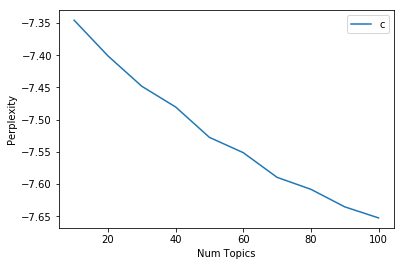

In [31]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")
plt.legend(("coherence_values"), loc='best')
plt.show()

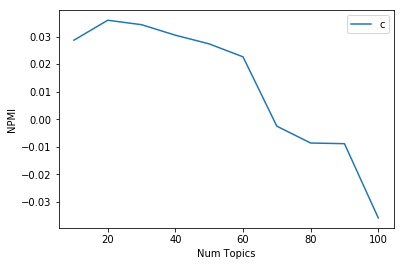

In [32]:
# Show graph
limit=110; start=10; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("NPMI")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# Build LDA

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=train,
                                           id2word=id2word,
                                           num_topics=150, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           per_word_topics=True)

In [ ]:
lda_model.save("lda_model_gensim")

In [ ]:
lda_model

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(30))
doc_lda = lda_model[test]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [36]:
file = open('all_data_df_large.pkl', 'rb')
# dump information to that file
all_data_df = pickle.load(file)
# close the file
file.close()

In [58]:
model = gensim.models.LdaMulticore.load("model_100")

theta, _ = model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)




from sklearn.linear_model import LogisticRegression

x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
clf.score(theta_df_test, list(all_data_df.iloc[test_index]['category']))


/home/prdx/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6497554919683275

In [43]:
model = gensim.models.LdaMulticore.load("model_20")

theta, _ = model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)


from sklearn.linear_model import LogisticRegression

x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x, y)
clf.score(theta_df_test, list(all_data_df.iloc[test_index]['category']))


/home/prdx/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.5888177317527366

In [73]:
model = gensim.models.LdaMulticore.load("model_20")

theta, _ = model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)



from sklearn.ensemble import RandomForestClassifier

x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = RandomForestClassifier().fit(x, y)
clf.score(theta_df_test, list(all_data_df.iloc[test_index]['category']))


/home/prdx/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.547077258482082

In [76]:
model = gensim.models.LdaMulticore.load("model_10")

theta, _ = model.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)



from sklearn.ensemble import RandomForestClassifier

x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = RandomForestClassifier().fit(x, y)
clf.score(theta_df_test, list(all_data_df.iloc[test_index]['category']))


/home/prdx/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.465897564003573

In [84]:
all_data_df.loc[1051127]

reviewerID                                            ANVY8NSVZZXAR
asin                                                     B007MJSZDQ
reviewerName                                                   Ralz
helpful                                                      [0, 0]
reviewText        Batteries came in as duds, they offered to rep...
overall                                                           1
summary                                        Batteries don't work
unixReviewTime                                           1388448000
reviewTime                                              12 31, 2013
category                                                Video_Games
Name: 1051127, dtype: object

In [83]:
theta, _ = model.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)

In [86]:
theta_df_test.iloc[0]

0    0.000621
1    0.291502
2    0.000621
3    0.418321
4    0.000621
5    0.000621
6    0.000621
7    0.000621
8    0.285829
9    0.000621
Name: 0, dtype: float32

In [79]:
# model = gensim.models.LdaMulticore.load("model_100")

# theta, _ = model.inference(train)
# theta /= theta.sum(axis=1)[:, None]
# theta_df_train = pd.DataFrame(theta)

# theta, _ = model.inference(test)
# theta /= theta.sum(axis=1)[:, None]
# theta_df_test = pd.DataFrame(theta)



from sklearn.ensemble import RandomForestClassifier

x = pd.DataFrame(train)
print(x)
# y = list(all_data_df.iloc[train_index]['category'])

# clf = RandomForestClassifier().fit(x, y)
# clf.score(test, list(all_data_df.iloc[test_index]['category']))


             0         1         2          3          4          5    \
0         (4, 1)   (14, 1)   (43, 1)    (59, 1)   (113, 1)   (589, 1)   
1         (4, 1)   (40, 1)   (84, 1)   (107, 1)   (225, 1)   (262, 1)   
2         (7, 1)   (10, 1)   (22, 1)    (43, 1)   (386, 1)   (448, 1)   
3         (4, 2)   (16, 1)   (18, 1)    (31, 1)    (75, 1)    (76, 1)   
4        (16, 1)  (149, 1)  (262, 1)   (318, 1)   (363, 1)   (448, 1)   
5         (2, 1)   (17, 1)  (137, 1)   (386, 1)   (429, 1)  (1496, 1)   
6       (116, 1)  (386, 1)  (424, 1)   (429, 1)   (439, 1)   (485, 1)   
7         (4, 1)   (15, 1)   (18, 1)    (50, 1)    (55, 1)    (70, 1)   
8         (4, 1)   (21, 1)   (40, 1)   (116, 2)   (118, 1)   (153, 5)   
9         (5, 1)  (111, 1)  (203, 1)   (249, 1)   (329, 1)   (507, 1)   
10       (30, 1)  (175, 1)  (206, 1)   (208, 1)   (302, 1)   (363, 1)   
11       (17, 1)  (184, 1)  (506, 1)   (523, 1)  (1407, 1)       None   
12       (17, 1)   (18, 1)   (20, 1)    (41, 2)    

In [45]:
model100 = gensim.models.LdaMulticore.load("model_100")
pprint(model100.print_topics(100, num_words=10))


[(0,
  '0.143*"water" + 0.030*"fill" + 0.030*"leak" + 0.028*"bottle" + 0.021*"meet" '
  '+ 0.015*"use" + 0.015*"seal" + 0.012*"flow" + 0.012*"squeeze" + '
  '0.010*"drink"'),
 (1,
  '0.121*"toy" + 0.091*"son" + 0.046*"love" + 0.037*"play" + 0.032*"old" + '
  '0.021*"year" + 0.019*"month" + 0.017*"get" + 0.015*"little" + 0.015*"buy"'),
 (2,
  '0.045*"coffee" + 0.040*"cup" + 0.034*"food" + 0.024*"good" + 0.022*"taste" '
  '+ 0.022*"mix" + 0.018*"make" + 0.016*"use" + 0.015*"try" + 0.015*"drink"'),
 (3,
  '0.087*"play" + 0.086*"game" + 0.069*"fun" + 0.024*"child" + 0.019*"great" + '
  '0.019*"kid" + 0.017*"learn" + 0.013*"adult" + 0.013*"lot" + 0.012*"enjoy"'),
 (4,
  '0.035*"attempt" + 0.021*"starter" + 0.020*"youtube" + 0.017*"worthless" + '
  '0.014*"beginning" + 0.014*"clay" + 0.014*"task" + 0.009*"hammer" + '
  '0.009*"accomplish" + 0.009*"generator"'),
 (5,
  '0.048*"oil" + 0.046*"product" + 0.027*"use" + 0.020*"ingredient" + '
  '0.019*"contain" + 0.019*"vitamin" + 0.019*"natural" 

In [87]:
pprint(model.print_topics(10, num_words=10))


[(0,
  '0.045*"case" + 0.029*"phone" + 0.019*"look" + 0.017*"fit" + 0.014*"good" + '
  '0.013*"great" + 0.013*"cover" + 0.012*"color" + 0.009*"use" + 0.009*"make"'),
 (1,
  '0.042*"love" + 0.018*"old" + 0.017*"toy" + 0.015*"buy" + 0.015*"great" + '
  '0.015*"year" + 0.014*"son" + 0.013*"dog" + 0.012*"daughter" + 0.012*"get"'),
 (2,
  '0.018*"good" + 0.016*"taste" + 0.012*"product" + 0.011*"flavor" + '
  '0.010*"make" + 0.010*"use" + 0.010*"try" + 0.009*"food" + 0.009*"great" + '
  '0.009*"take"'),
 (3,
  '0.065*"game" + 0.023*"play" + 0.012*"good" + 0.011*"fun" + 0.009*"time" + '
  '0.008*"make" + 0.007*"great" + 0.006*"go" + 0.006*"get" + 0.006*"much"'),
 (4,
  '0.024*"song" + 0.016*"good" + 0.015*"album" + 0.015*"love" + 0.013*"great" '
  '+ 0.013*"music" + 0.012*"show" + 0.009*"watch" + 0.008*"hear" + '
  '0.007*"time"'),
 (5,
  '0.034*"use" + 0.023*"product" + 0.017*"hair" + 0.012*"work" + 0.011*"skin" '
  '+ 0.011*"good" + 0.009*"try" + 0.009*"smell" + 0.008*"day" + 0.008*"time"')

In [48]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=train, num_topics=20, id2word=id2word)



In [50]:
# Show Topics
pprint(ldamallet.show_topics(20,formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('buy', 0.18071626877822386),
   ('price', 0.080171448054162),
   ('find', 0.058983975451755884),
   ('good', 0.04629932436663721),
   ('money', 0.04544347571964347),
   ('worth', 0.04211053667972474),
   ('cheap', 0.03841577544758101),
   ('purchase', 0.03700327727408727),
   ('store', 0.036363130318612276),
   ('brand', 0.024645657785787346)]),
 (1,
  [('good', 0.05649928955648026),
   ('quality', 0.04755531310260834),
   ('sound', 0.03640388714097229),
   ('high', 0.028975946412260225),
   ('set', 0.026812899624479854),
   ('make', 0.01909951283872932),
   ('low', 0.016390946919719884),
   ('build', 0.011068963767380494),
   ('ear', 0.010485385161879631),
   ('guitar', 0.01033314726479245)]),
 (2,
  [('game', 0.1256595907272789),
   ('play', 0.05508398748289054),
   ('fun', 0.01963657820533283),
   ('level', 0.01100809162446737),
   ('graphic', 0.009856981867603032),
   ('player', 0.0095474397481101),
   ('system', 0.00797070957694298),
   ('character', 0.007849794686516054)

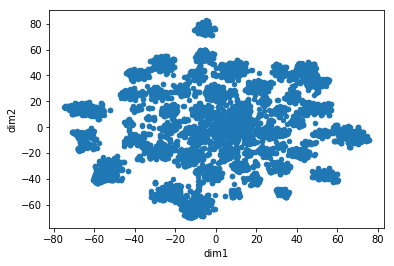

In [64]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2)

# TSNE is taking too long for bigger dataset
theta_df_test_with_labels = theta_df_test
theta_df_test_with_labels["labels"] = list(all_data_df.iloc[test_index]['category']) 
reduced_X = theta_df_test_with_labels.sample(n=6000)

tsne_data = tsne.fit_transform(reduced_X.ix[:, :100])
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

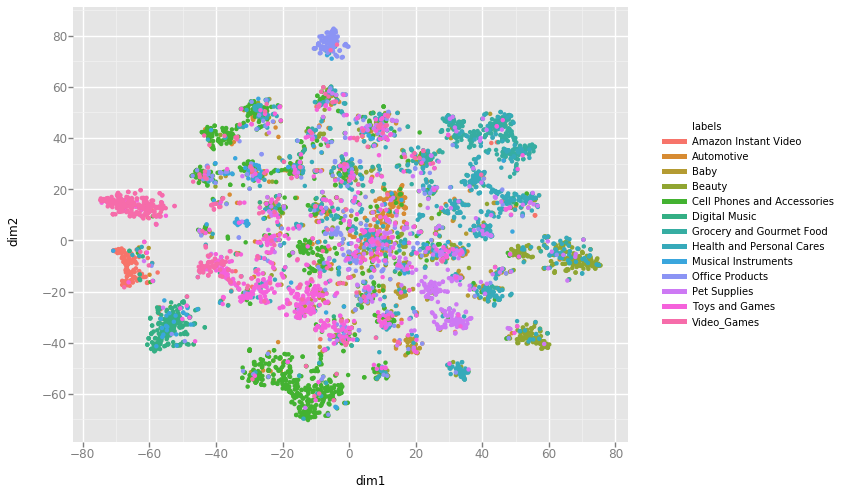

<ggplot: (-9223363284241149289)>

In [65]:
tsne_data['labels'] = list(reduced_X['labels'])
from ggplot import *
ggplot(tsne_data, aes(x='dim1', y='dim2', color='labels')) +\
    geom_point()

In [72]:
len(model.get_topics()[0])

10000

# Visualization

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dct,mds='tsne',sort_topics=False)
pyLDAvis.display(vis)

In [ ]:
pyLDAvis.save_html(vis, 'lda.html')

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

# t - sne Visulization 

In [ ]:
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_train = pd.DataFrame(theta)

theta, _ = lda_model_2.inference(test)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)

# SVM

In [ ]:
from sklearn import svm
x = theta_df_train
y = list(all_data_df.iloc[train_index]['category'])

clf = svm.LinearSVC()
clf.fit(x,y)
result = clf.predict(theta_df_test)

i = 0
for y,y_pred in zip(all_data_df.iloc[test_index]['category'],result):
    if y == y_pred:
        i +=1
        
print(i/len(result)*100)

# PCA

# Building LDA Mallet Model

In [ ]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:/Xiaomeng/mallet/'})
mallet_path = 'C:\\Xiaomeng\\mallet\\bin\\mallet' # update this path

#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

#result = (ldamallet.show_topics(num_topics=3, num_words=10,formatted=False))
#for each in result:
#print (each)
#os.environ['MALLET_HOME'] = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet'
#mallet_path = 'C:/Users/Xiaomeng/OneDrive/Project/Category Dataframe/mallet/bin/mallet' # update this path
#mallet_path = 'C:\Users\Xiaomeng\OneDrive\Project\Category Dataframe\mallet\bin\mallet' # update this path
ldamallet = LdaMallet(mallet_path, corpus=train, num_topics=30, id2word=id2word)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Build LDA model with the result from hyperparameter tuning
lda_model_2 = gensim.models.LdaMulticore(corpus=train,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.6,
                                            eta=0.05,
                                           per_word_topics=True)

lda_model_2.save("lda_model2_gensim")

In [ ]:
lda_model_2 = gensim.models.LdaModel.load("lda_model2_gensim")
theta, _ = lda_model_2.inference(train)
theta /= theta.sum(axis=1)[:, None]
theta_df_test = pd.DataFrame(theta)
tsne = TSNE(n_components=2, perplexity=50)

# Clean and sample the data from each categories
#theta_df_clean = theta_df[ theta_df['category'] != "" ]
#theta_df_grouped = theta_df_clean.groupby(['category'])
#theta_df_grouped = theta_df_grouped.apply(lambda x: x.sample(frac=0.3))
# TSNE is taking too long for bigger dataset
reduced_X = theta_df_grouped.sample(n=6000)


tsne_data = tsne.fit_transform(reduced_X.ix[:, :30])
tsne_data = pd.DataFrame(tsne_data, columns=["dim1", "dim2"])
tsne_data.plot("dim1", "dim2", kind="scatter")

In [ ]:
tsne_data

In [ ]:
    # label_marker dictionary for true labels
    unqique_label = np.unique(result_df['labels_predict'].tolist())
    unqique_true_label = np.unique(result_df['label'].tolist())
    markers = ['o','*','s']
    keys = [str(x) for x in unqique_true_label]
    true_label_dict = dict(zip(keys, markers))
    
    for k in unqique_predict_label:
        result_df.loc[(result_df['labels_predict']== k),'color'] = label_dict[str(int(k))]
            
    for kt in unqique_true_label:
        result_df.loc[(result_df['label']== kt),'marker'] = true_label_dict[str(kt)]
    

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_2.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, corpus=test,texts=data_lemmatized, dictionary=id2word, coherence='c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)